<a href="https://colab.research.google.com/github/Guliko24/NetZoo_network/blob/main/GRN_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# This is a block of code working with single files from MCF7 and MDA-MB-231 cell lines



In [1]:
#import all the packages as needed
import pandas as pd
import networkx as nx

In [2]:
# prompt: let's load Gdrive onto notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Navigate to your Google Drive files
%cd /content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets


In [4]:
#let's read the MCF7_TF_Genes dataset and make changes
df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

In [5]:
#let's do initial data assessment
df_MCF7_TF_Genes.head()


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
Row,,,,,,,,,,,,,,,,,,,,,
AHR,-1.443279,-1.967447,-2.760445,-2.073087,1.251514,0.385485,-1.715180,2.865040,0.034788,-1.152120,...,-0.878857,0.459640,1.375959,-1.016009,-0.242322,1.891062,-0.818321,-0.052743,-0.473725,-0.298555
AHRR,-1.247997,-2.028449,-2.831273,-1.976606,1.202019,0.408661,-1.723908,2.810044,0.225790,-1.189913,...,-0.761727,0.619967,1.403784,-0.775855,-0.152985,1.974241,-0.680559,0.012663,-0.332161,-0.117967
AIRE,-1.380017,2.783954,1.011333,3.807602,-3.535072,-1.611140,1.657074,-1.797554,-1.676323,-1.153214,...,-1.082261,-1.291455,-1.956019,-0.419732,-0.210442,-1.207542,-0.703877,-1.442472,-0.474597,-0.882657
ALX1,-2.001329,3.642444,-0.656243,0.632257,0.204571,-0.584100,1.287642,0.738631,-1.492440,2.054034,...,-1.472459,-1.322024,-0.123587,-2.152722,-2.204323,-0.050309,-2.532883,-0.852312,-2.007539,-1.760582
ALX3,-1.201413,0.550952,-0.211441,0.657875,-0.089130,-0.913549,0.404178,0.546880,-1.522372,0.821050,...,-2.399966,-1.392676,0.684690,-2.412815,-2.458452,0.413145,-2.533361,-1.395355,-2.138298,-2.579043


In [6]:
df_MCF7_TF_Genes.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1132 entries, AHR to ZSCAN9
Columns: 16383 entries, A1BG to TMEM97
dtypes: float64(16383)
memory usage: 141.5+ MB


In [7]:
print(df_MCF7_TF_Genes.describe())

              A1BG         A1CF          A2M        A2ML1      A3GALT2  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000   
mean     -0.199907     0.095889    -0.012865    -0.094739     0.198359   
std       1.678212     1.799404     2.252995     1.607752     2.163127   
min      -2.760505    -2.629948    -4.034686    -2.626029    -9.267207   
25%      -1.401818    -1.327776    -1.436337    -1.112496    -0.999215   
50%      -0.648784    -0.230834    -0.423527    -0.377356     0.317033   
75%       0.629196     1.019549     0.892078     0.498847     1.661686   
max      12.642667    10.412639    13.711460    12.098564     6.186273   

            A4GALT        A4GNT         AAAS         AACS        AADAC  ...  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000  ...   
mean     -0.024695     0.086092     0.334350    -0.159868     0.029493  ...   
std       1.389114     1.512006     2.696839     1.433202     1.316912  ...   
min      -3.45439

In [8]:
print(df_MCF7_TF_Genes.isnull().sum())

A1BG       0
A1CF       0
A2M        0
A2ML1      0
A3GALT2    0
          ..
TMEM91     0
TMEM92     0
TMEM94     0
TMEM95     0
TMEM97     0
Length: 16383, dtype: int64


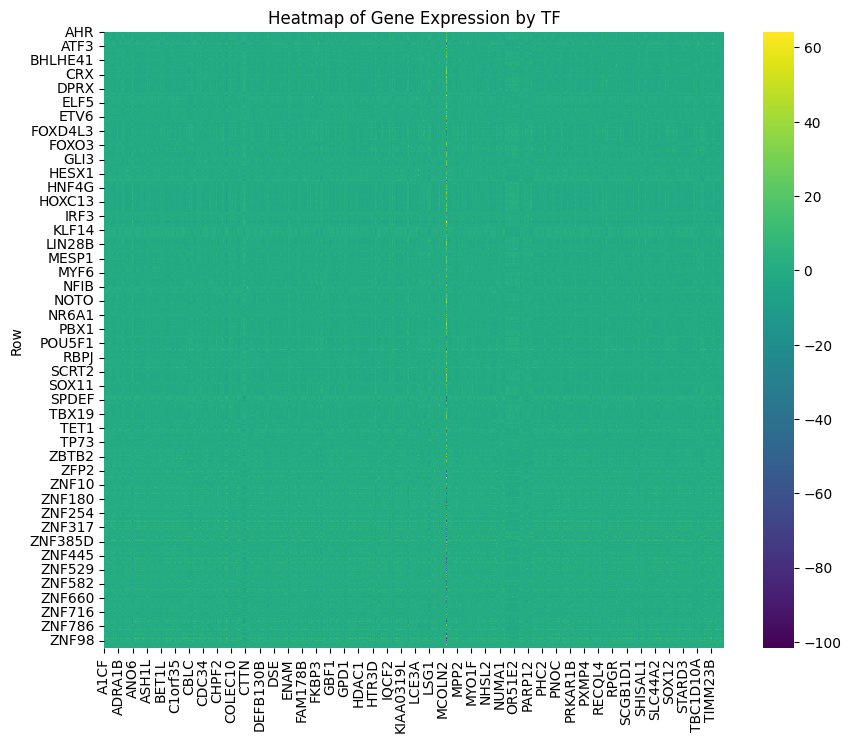

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_MCF7_TF_Genes.iloc[:, 1:], cmap='viridis')  # Skipping the first column if it's TF names
plt.title('Heatmap of Gene Expression by TF')
plt.show()


#let's convert CTCF-genes file into some adjancy matrix for future use

---


In [10]:
import numpy as np
import pandas as pd

def normalize_matrix(matrix: pd.DataFrame) -> pd.DataFrame:
    """
    Normalize the values in the matrix to a range of [0, 1].
    """
    normalized_matrix = (matrix - matrix.min().min()) / (matrix.max().max() - matrix.min().min())
    return normalized_matrix

def filter_by_threshold(matrix: pd.DataFrame, threshold: float, mode: str = 'greater') -> pd.DataFrame:
    """
    Filter the matrix based on a threshold.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        threshold: The threshold value for filtering.
        mode: 'greater' to keep values greater than threshold, 'less' to keep values less than threshold.
    """
    if mode == 'greater':
        return matrix[matrix > threshold].fillna(0)
    elif mode == 'less':
        return matrix[matrix < threshold].fillna(0)
    else:
        raise ValueError("Mode must be either 'greater' or 'less'")

def binarize_matrix(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Binarize the matrix based on a threshold.
    Values greater than or equal to the threshold become 1, otherwise 0.
    """
    binary_matrix = (matrix >= threshold).astype(int)
    return binary_matrix

def rank_interactions(matrix: pd.DataFrame, top_n: int = 5) -> pd.DataFrame:
    """
    Rank the top N interactions for each transcription factor.
    Parameters:
        matrix: The TF vs Genes interaction matrix.
        top_n: Number of top interactions to return for each TF.
    """
    ranked_interactions = pd.DataFrame()
    for tf in matrix.index:
        top_genes = matrix.loc[tf].nlargest(top_n)
        ranked_interactions = pd.concat([ranked_interactions, top_genes], axis=1)
    return ranked_interactions.T

def aggregate_interactions(matrix: pd.DataFrame, axis: int = 0) -> pd.Series:
    """
    Aggregate interaction strengths.
    Parameters:
        axis: 0 to aggregate across genes (per TF), 1 to aggregate across TFs (per Gene).
    """
    return matrix.sum(axis=axis)

def construct_interaction_network(matrix: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Construct an interaction network by keeping only interactions above a threshold.
    Returns a DataFrame representing edges in the network.
    """
    filtered_matrix = filter_by_threshold(matrix, threshold, mode='greater')
    edges = []
    for tf in filtered_matrix.index:
        for gene in filtered_matrix.columns:
            if filtered_matrix.loc[tf, gene] > 0:
                edges.append((tf, gene, filtered_matrix.loc[tf, gene]))
    network_df = pd.DataFrame(edges, columns=['TF', 'Gene', 'Interaction_Strength'])
    return network_df

def split_positive_negative_matrices(matrix: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Split the matrix into two DataFrames: one for positive values and one for negative values.
    Ensure that the matrix values are numeric by coercing errors and replacing non-numeric values with NaN.
    Retain the index and columns in both matrices.
    """
    matrix_numeric = matrix.apply(pd.to_numeric, errors='coerce')
    positive_matrix = matrix_numeric.where(matrix_numeric > 0).fillna(0)
    negative_matrix = matrix_numeric.where(matrix_numeric < 0).fillna(0)
    positive_matrix.index = matrix.index
    positive_matrix.columns = matrix.columns
    negative_matrix.index = matrix.index
    negative_matrix.columns = matrix.columns
    return positive_matrix, negative_matrix

def check_repeated_indices_columns(matrix: pd.DataFrame):
    """
    Check for repeated transcription factors (rows) and genes (columns) in the matrix.
    """
    repeated_rows = matrix.index[matrix.index.duplicated()].unique()
    repeated_columns = matrix.columns[matrix.columns.duplicated()].unique()

    print("Repeated Rows (TFs):")
    if len(repeated_rows) > 0:
        print(repeated_rows)
    else:
        print("No repeated rows found.")

    print("\nRepeated Columns (Genes):")
    if len(repeated_columns) > 0:
        print(repeated_columns)
    else:
        print("No repeated columns found.")



In [11]:
# Example Usage
# Read the TF vs Genes matrix from a CSV file
#df_MCF7_TF_Genes = pd.read_csv('/content/drive/MyDrive/Essex_MSc_AI_24-25/MSc_Project_24/Data_to_work_with/GRAND_datasets/MCF7_raw/ACH-000019_TF_vs_Genes_total expression.csv', index_col=0)

# Normalize the matrix
#normalized_df = normalize_matrix(df_MCF7_TF_Genes)

# Filter interactions greater than 0.5
#filtered_df = filter_by_threshold(df_MCF7_TF_Genes, threshold=0.5, mode='greater')

# Binarize the matrix with a threshold of 0.5
#binary_df = binarize_matrix(df_MCF7_TF_Genes, threshold=0.5)

# Rank top 2 interactions for each TF
#ranked_df = rank_interactions(df_MCF7_TF_Genes, top_n=2)

# Aggregate interactions across genes (per TF)
#aggregated_series = aggregate_interactions(df_MCF7_TF_Genes, axis=1)

# Construct interaction network with a threshold of 0.5
#network_df = construct_interaction_network(df_MCF7_TF_Genes, threshold=0.5)

# Split the matrix into positive and negative interaction matrices
positive_df, negative_df = split_positive_negative_matrices(df_MCF7_TF_Genes)

In [12]:
positive_df.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
Row,,,,,,,,,,,,,,,,,,,,,
AHR,0.0,0.000000,0.000000,0.000000,1.251514,0.385485,0.000000,2.865040,0.034788,0.000000,...,0.0,0.459640,1.375959,0.0,0.0,1.891062,0.0,0.000000,0.0,0.0
AHRR,0.0,0.000000,0.000000,0.000000,1.202019,0.408661,0.000000,2.810044,0.225790,0.000000,...,0.0,0.619967,1.403784,0.0,0.0,1.974241,0.0,0.012663,0.0,0.0
AIRE,0.0,2.783954,1.011333,3.807602,0.000000,0.000000,1.657074,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
ALX1,0.0,3.642444,0.000000,0.632257,0.204571,0.000000,1.287642,0.738631,0.000000,2.054034,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
ALX3,0.0,0.550952,0.000000,0.657875,0.000000,0.000000,0.404178,0.546880,0.000000,0.821050,...,0.0,0.000000,0.684690,0.0,0.0,0.413145,0.0,0.000000,0.0,0.0


In [13]:
negative_df

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,TMEM88,TMEM88B,TMEM89,TMEM8B,TMEM9,TMEM91,TMEM92,TMEM94,TMEM95,TMEM97
Row,,,,,,,,,,,,,,,,,,,,,
AHR,-1.443279,-1.967447,-2.760445,-2.073087,0.000000,0.000000,-1.715180,0.000000,0.000000,-1.152120,...,-0.878857,0.000000,0.000000,-1.016009,-0.242322,0.000000,-0.818321,-0.052743,-0.473725,-0.298555
AHRR,-1.247997,-2.028449,-2.831273,-1.976606,0.000000,0.000000,-1.723908,0.000000,0.000000,-1.189913,...,-0.761727,0.000000,0.000000,-0.775855,-0.152985,0.000000,-0.680559,0.000000,-0.332161,-0.117967
AIRE,-1.380017,0.000000,0.000000,0.000000,-3.535072,-1.611140,0.000000,-1.797554,-1.676323,-1.153214,...,-1.082261,-1.291455,-1.956019,-0.419732,-0.210442,-1.207542,-0.703877,-1.442472,-0.474597,-0.882657
ALX1,-2.001329,0.000000,-0.656243,0.000000,0.000000,-0.584100,0.000000,0.000000,-1.492440,0.000000,...,-1.472459,-1.322024,-0.123587,-2.152722,-2.204323,-0.050309,-2.532883,-0.852312,-2.007539,-1.760582
ALX3,-1.201413,0.000000,-0.211441,0.000000,-0.089130,-0.913549,0.000000,0.000000,-1.522372,0.000000,...,-2.399966,-1.392676,0.000000,-2.412815,-2.458452,0.000000,-2.533361,-1.395355,-2.138298,-2.579043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN31,0.000000,-1.814879,-1.906737,-1.091507,0.000000,0.000000,-0.628054,0.000000,0.000000,-1.031869,...,0.000000,0.000000,0.000000,-1.474306,0.000000,0.000000,0.000000,0.000000,-0.724492,-0.482245
ZSCAN4,-0.574789,-0.157441,0.000000,-0.438078,0.000000,-0.301469,-0.089882,-0.210761,-0.424703,0.000000,...,-0.340126,-0.793296,-0.461062,-0.801028,-1.081565,-0.185078,-0.170766,-0.586690,0.000000,-1.189845
ZSCAN5A,-0.352297,-1.245130,0.000000,0.000000,-2.184980,-0.642928,-1.681611,-1.513285,0.000000,0.000000,...,0.000000,0.000000,-1.200345,0.000000,0.000000,0.000000,0.000000,-0.514664,0.000000,0.000000


Let's check each dataframes (positive and negative) for:

1) distribution of values:

  remove zero interactions
  may be create subnodes where there are more genes per TF
  may be create subnodes where there are more TFs per gene

2) non-zero interactions

3) visualization


Positive Matrix Summary:
              A1BG         A1CF          A2M        A2ML1      A3GALT2  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000   
mean      0.552329     0.745378     0.812198     0.530653     0.935819   
std       1.200745     1.309017     1.658905     1.192507     1.216531   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.317033   
75%       0.629196     1.019549     0.892078     0.498847     1.661686   
max      12.642667    10.412639    13.711460    12.098564     6.186273   

            A4GALT        A4GNT         AAAS         AACS        AADAC  ...  \
count  1132.000000  1132.000000  1132.000000  1132.000000  1132.000000  ...   
mean      0.526662     0.561540     1.198074     0.476302     0.505742  ...   
std       0.913560     1.177120     1.490741     0.992800     0.932093 

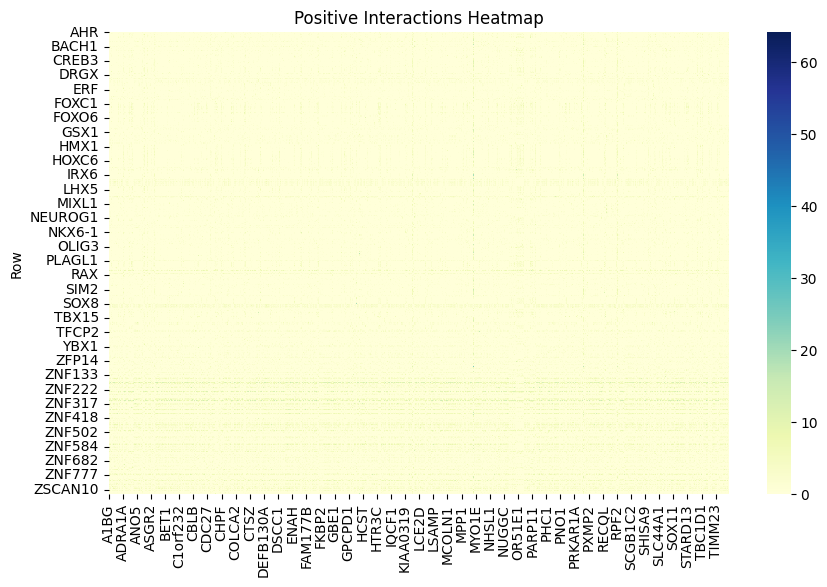

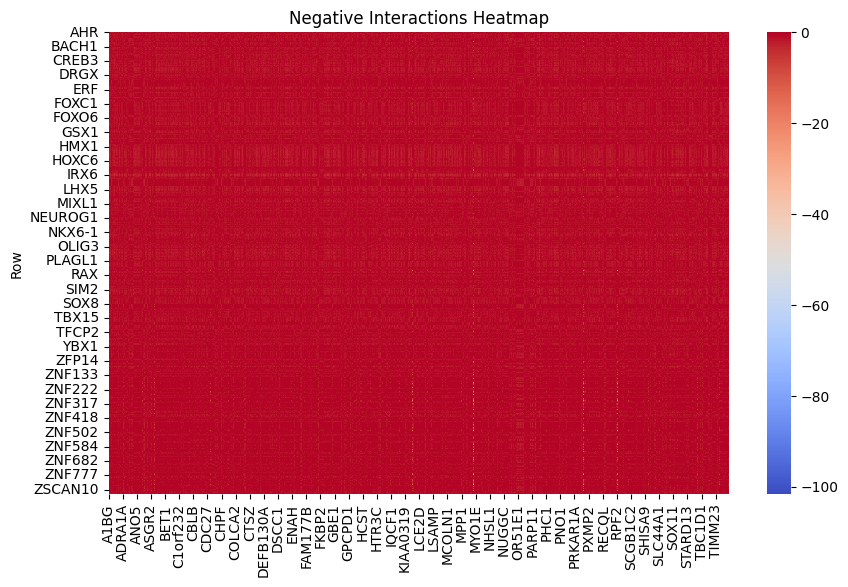

In [14]:
# Check summary statistics for positive and negative matrices
print("Positive Matrix Summary:")
print(positive_df.describe())
print("\nNegative Matrix Summary:")
print(negative_df.describe())

# Count non-zero interactions in positive and negative matrices
positive_nonzero_count = (positive_df > 0).sum().sum()
negative_nonzero_count = (negative_df < 0).sum().sum()

print(f"\nNumber of non-zero interactions in Positive Matrix: {positive_nonzero_count}")
print(f"Number of non-zero interactions in Negative Matrix: {negative_nonzero_count}")

# Visualize the matrices using heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Positive Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(positive_df, cmap="YlGnBu", cbar=True)
plt.title("Positive Interactions Heatmap")
plt.show()

# Negative Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(negative_df, cmap="coolwarm", cbar=True)
plt.title("Negative Interactions Heatmap")
plt.show()


In [15]:
#lets check whether there is a repetition of rows or columns
# Check for repeated rows (TFs) and columns (Genes)
check_repeated_indices_columns(positive_df)
check_repeated_indices_columns(negative_df)

Repeated Rows (TFs):
No repeated rows found.

Repeated Columns (Genes):
No repeated columns found.
Repeated Rows (TFs):
No repeated rows found.

Repeated Columns (Genes):
No repeated columns found.


In [16]:
# Flatten the dataframe into a series with TF-Gene pair as the index
ranked_positive_df = positive_df.stack().sort_values(ascending=False)

# Get the top 200 interactions
top_200_positive_df = ranked_positive_df.head(200)
print(top_200_positive_df)


Row         
IRX6   MEOX2    64.130060
IRX4   MEOX2    63.920394
IRX6   FIGN     60.464314
IRX4   FIGN     60.087284
ZHX1   FIGN     57.886189
                  ...    
SMAD4  FIGN     29.687624
TBX20  FIGN     29.650010
BSX    MEOX2    29.636152
SMAD4  MEOX2    29.634518
GATA2  MEOX2    29.617659
Length: 200, dtype: float64


In [17]:
# Flatten the dataframe into a series with TF-Gene pair as the index
ranked_negative_df = negative_df.stack().sort_values(ascending=True)

# Get the top 200 interactions
top_200_negative_df = ranked_negative_df.head(200)
print(top_200_negative_df)


Row          
ZNF287  FIGN    -101.616735
ZNF432  FIGN     -89.941910
ZNF287  MEOX2    -87.128990
ZNF235  FIGN     -85.876623
ZNF880  FIGN     -85.234935
                    ...    
ZNF283  FIGN     -36.789601
ZNF132  SCN1A    -36.684633
ZNF444  SCN1A    -36.670646
SP6     FIGN     -36.594428
FOXP4   FIGN     -36.581597
Length: 200, dtype: float64


In [18]:
# Rename the columns of the positive and negative dataframes
top_200_positive_df = top_200_positive_df.reset_index()
top_200_positive_df.columns = ["Source", "Target", "Edge weight"]

top_200_negative_df = top_200_negative_df.reset_index()
top_200_negative_df.columns = ["Source", "Target", "Edge weight"]

# Display the updated dataframes
print("Top 200 Positive Interactions:")
print(top_200_positive_df.head())

print("\nTop 200 Negative Interactions:")
print(top_200_negative_df.head())


Top 200 Positive Interactions:
  Source Target  Edge weight
0   IRX6  MEOX2    64.130060
1   IRX4  MEOX2    63.920394
2   IRX6   FIGN    60.464314
3   IRX4   FIGN    60.087284
4   ZHX1   FIGN    57.886189

Top 200 Negative Interactions:
   Source Target  Edge weight
0  ZNF287   FIGN  -101.616735
1  ZNF432   FIGN   -89.941910
2  ZNF287  MEOX2   -87.128990
3  ZNF235   FIGN   -85.876623
4  ZNF880   FIGN   -85.234935


In [19]:
top_200_positive_df["Source"]

,Source
0,IRX6
1,IRX4
2,IRX6
3,IRX4
4,ZHX1
...,...
195,SMAD4
196,TBX20
197,BSX
198,SMAD4


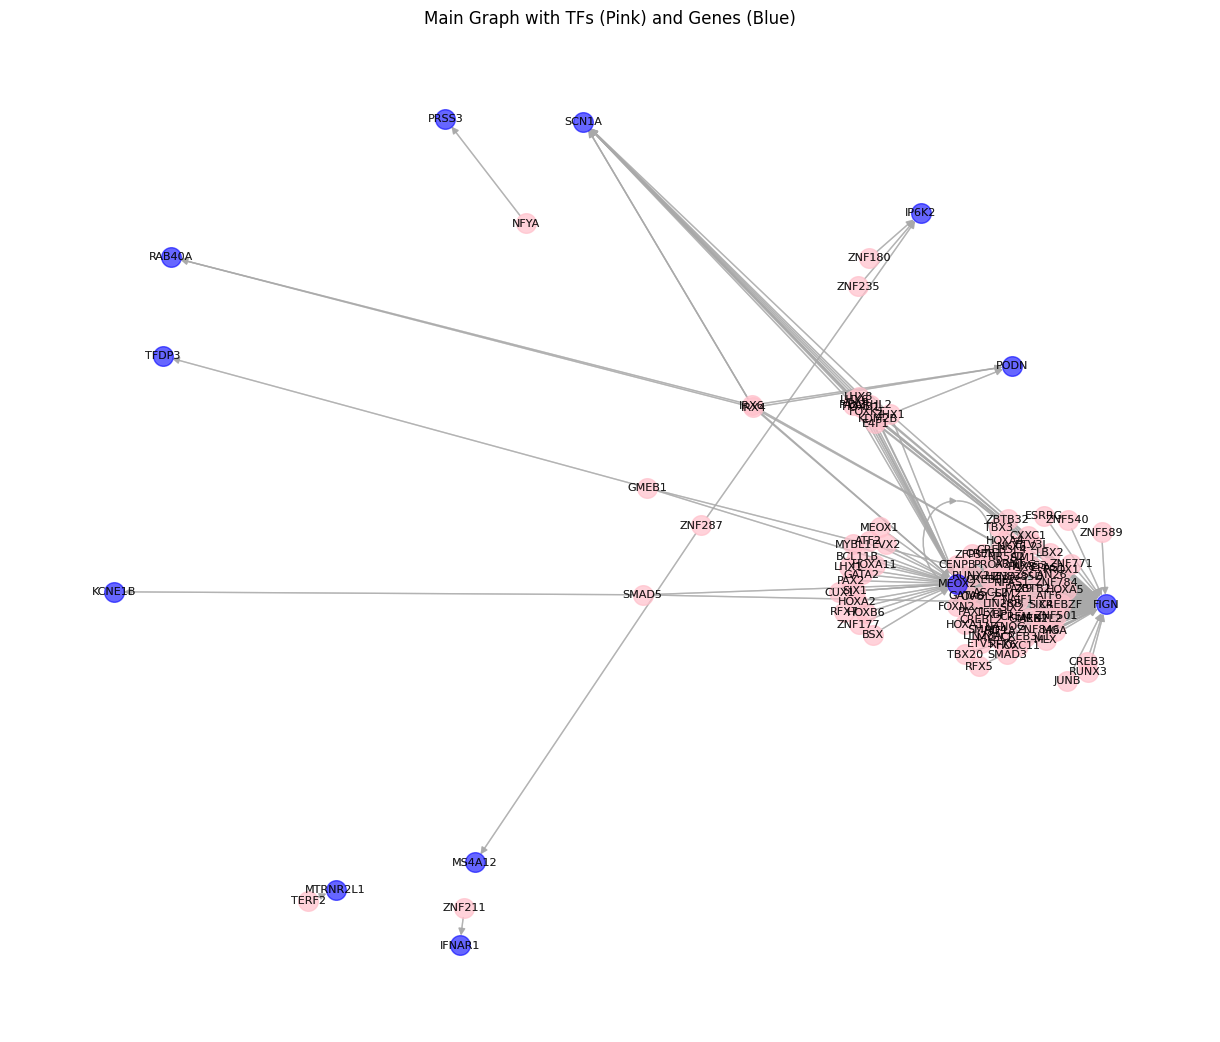

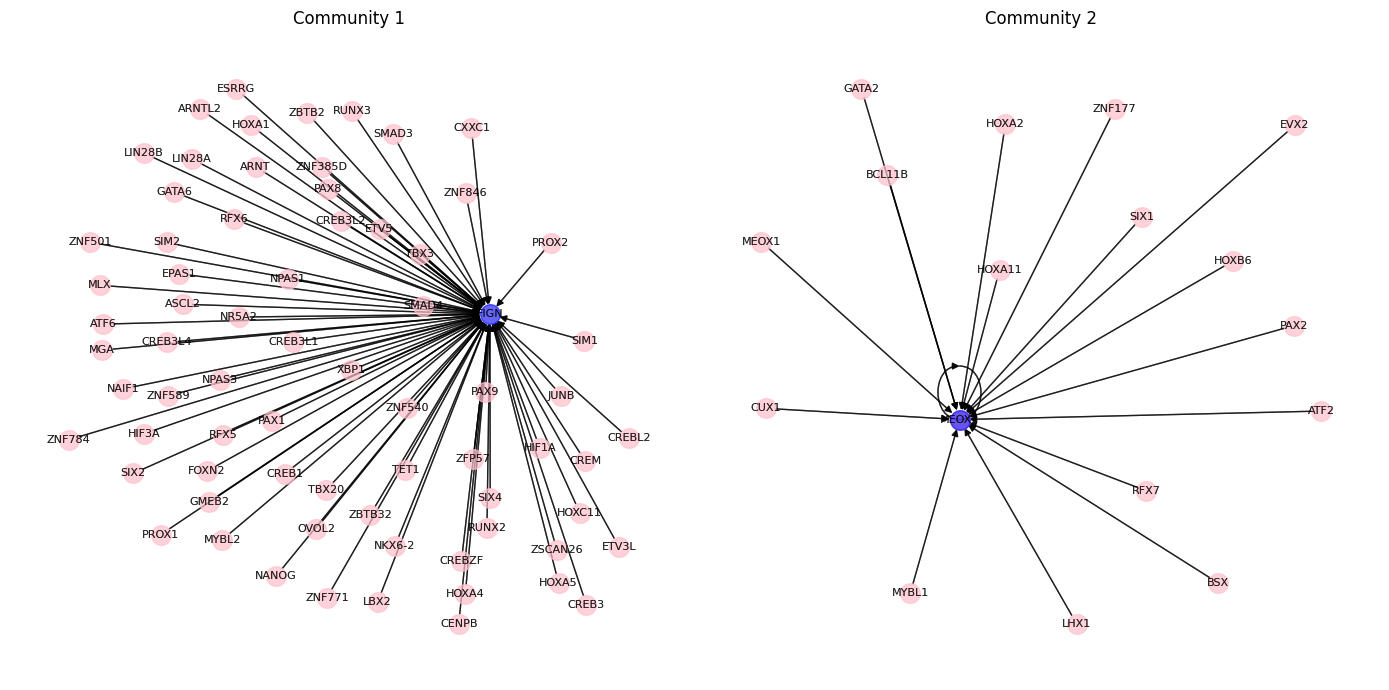

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import community



# Initialize directed graph for positive interactions
G_positive = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_200_positive_df.iterrows():
    G_positive.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_positive, k=0.8, iterations=100)

# Separate nodes based on Source and Target
source_nodes = set(top_200_positive_df['Source'])
target_nodes = set(top_200_positive_df['Target'])

# Draw the main graph
plt.figure(figsize=(12, 10))
nx.draw(
    G_positive, pos, with_labels=True, node_size=200, nodelist=source_nodes,
    node_color="pink", alpha=0.7, font_size=8, edge_color="darkgrey"
)
nx.draw(
    G_positive, pos, with_labels=True, node_size=200, nodelist=target_nodes,
    node_color="blue", alpha=0.6, font_size=8, edge_color="darkgrey"
)
plt.title("Main Graph with TFs (Pink) and Genes (Blue)")
plt.show()

# Calculate communities
communities = community.greedy_modularity_communities(G_positive)
# Create subplots for communities
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, comm in enumerate(communities[:2]):  # First two communities
    subgraph = G_positive.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, k=0.8)  # Separate layout for each community

    # Separate nodes into TFs and genes for this subgraph
    sub_source_nodes = [node for node in comm if node in source_nodes]
    sub_target_nodes = [node for node in comm if node in target_nodes]

    # Draw source nodes (TFs) in pink
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=200,
        nodelist=sub_source_nodes, node_color="pink", alpha=0.7, font_size=8
    )

    # Draw target nodes (genes) in blue
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=200,
        nodelist=sub_target_nodes, node_color="blue", alpha=0.6, font_size=8
    )

    axes[idx].set_title(f"Community {idx + 1}")

plt.tight_layout()
plt.show()


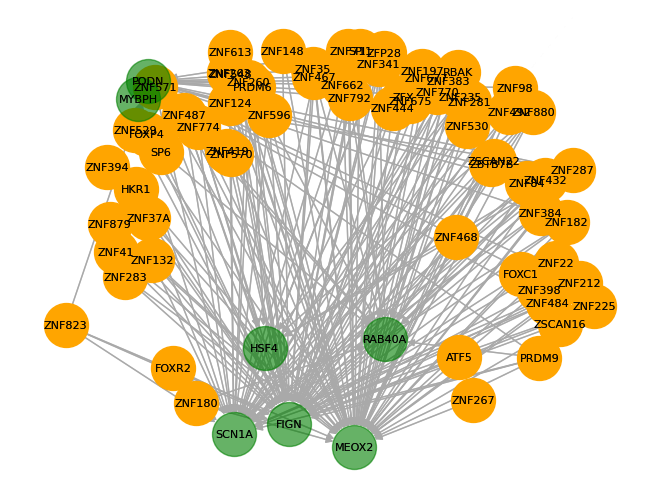

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


# Initialize directed graph for positive interactions
G_negative = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_200_negative_df.iterrows():
    G_negative.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_negative, k=0.6, iterations=30)

# Separate nodes based on Source and Target
source_nodes = set(top_200_negative_df['Source'])
target_nodes = set(top_200_negative_df['Target'])

# Draw the source nodes in pink
nx.draw(G_negative, pos, with_labels=True, node_size=1000, nodelist=source_nodes, node_color="orange", font_size=8, edge_color='darkgrey')

# Draw the target nodes in blue, without overriding the previously drawn source nodes
nx.draw(G_negative, pos, with_labels=True, node_size=1000, nodelist=target_nodes, node_color="green", alpha=0.6, font_size=8, edge_color='darkgrey')

# Draw edge labels to show weights with smaller font size
#edge_labels = nx.get_edge_attributes(G_negative, 'weight')
#nx.draw_networkx_edge_labels(G_negative, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()


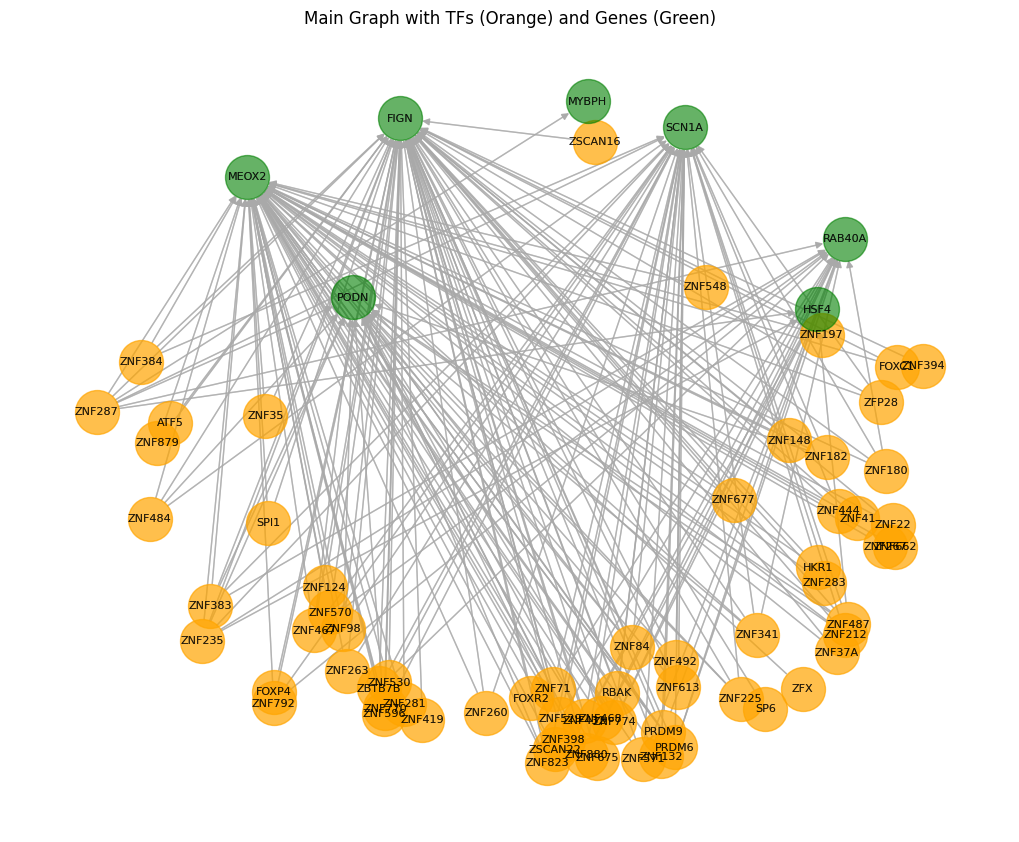

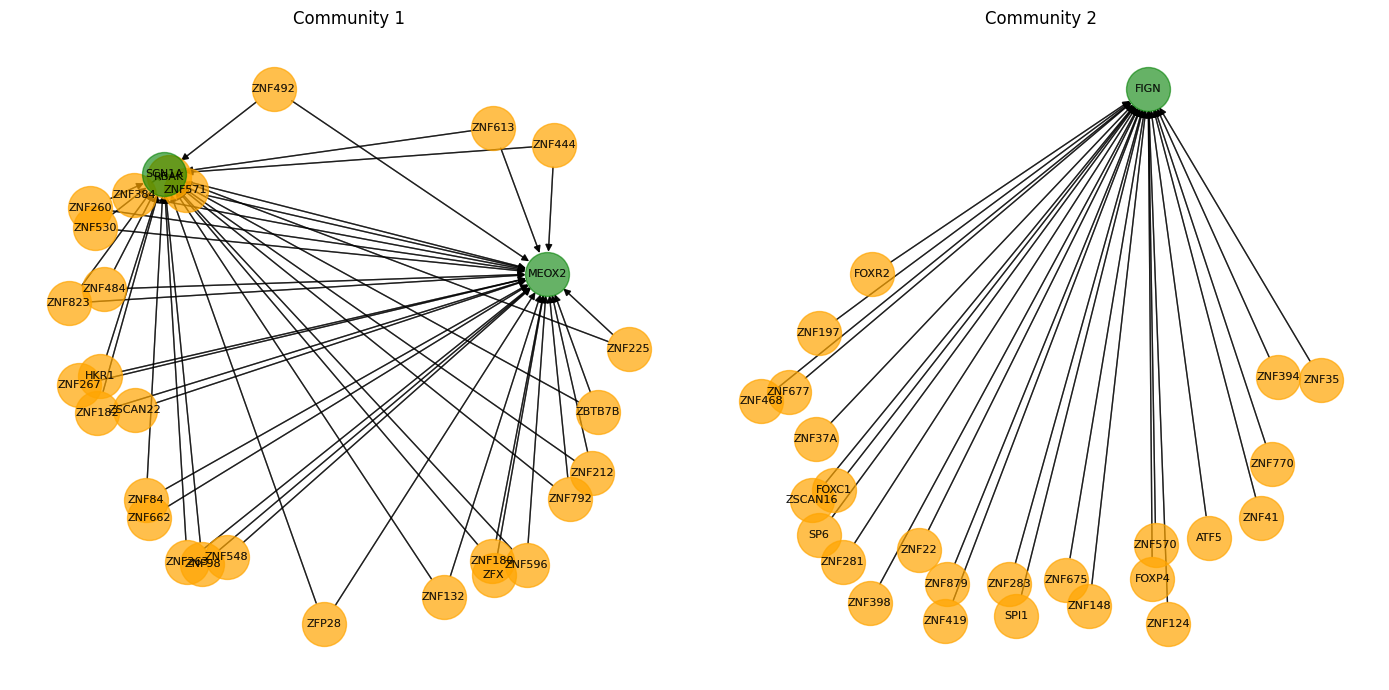

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from networkx.algorithms import community

# Initialize directed graph for negative interactions
G_negative = nx.DiGraph()

# Add edges from the dataframe to the directed graph
for _, row in top_200_negative_df.iterrows():
    G_negative.add_edge(row['Source'], row['Target'], weight=row['Edge weight'])

# Set a layout for the graph
pos = nx.spring_layout(G_negative, k=0.6, iterations=30)

# Separate nodes based on Source and Target
source_nodes = set(top_200_negative_df['Source'])
target_nodes = set(top_200_negative_df['Target'])

# Draw the main graph
plt.figure(figsize=(10, 8))
nx.draw(
    G_negative, pos, with_labels=True, node_size=1000, nodelist=source_nodes,
    node_color="orange", alpha=0.7, font_size=8, edge_color="darkgrey"
)
nx.draw(
    G_negative, pos, with_labels=True, node_size=1000, nodelist=target_nodes,
    node_color="green", alpha=0.6, font_size=8, edge_color="darkgrey"
)
plt.title("Main Graph with TFs (Orange) and Genes (Green)")
plt.show()

# Calculate communities for the negative graph
communities_negative = community.greedy_modularity_communities(G_negative)

# Create subplots for communities
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for idx, comm in enumerate(communities_negative[:2]):  # First two communities
    subgraph = G_negative.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, k=0.8)  # Separate layout for each community

    # Separate nodes into TFs and genes for this subgraph
    sub_source_nodes = [node for node in comm if node in source_nodes]
    sub_target_nodes = [node for node in comm if node in target_nodes]

    # Draw source nodes (TFs) in orange
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=1000,
        nodelist=sub_source_nodes, node_color="orange", alpha=0.7, font_size=8
    )

    # Draw target nodes (genes) in green
    nx.draw(
        subgraph, sub_pos, ax=axes[idx], with_labels=True, node_size=1000,
        nodelist=sub_target_nodes, node_color="green", alpha=0.6, font_size=8
    )

    axes[idx].set_title(f"Community {idx + 1}")

plt.tight_layout()
plt.show()


I have attempted using Kamada and Planar layouts and it did not yield any explainable or reasonable plots